# BEST ARM IDENTIFICATION

In [10]:
import matplotlib.pyplot as plt
import numpy as np

from src.arm import Arm
from src.algo.ttts import TTTS
from src.algo.ttei import TTEI
from src.algo.ttkg import TTKG
from src.algo.tttc import TTTC
from src.algo.ttebtc import TTEBTC
from src.algo.ttucb import TTUCB

In [11]:
# Function to run the experiment group

def run(params):
    all_iters_mean = {}
    all_iters = {}
    all_fail = {}
    all_pe = {}
    all_sr = {}
    all_cr = {}
    algos, means, top_two, adaptive, reps, confint = params
    for algo in algos:
        print(f"Running {algo} {'='*50}")
        fail = np.array([])
        iter = np.array([])
        pe = np.empty((0,2000))
        sr = np.empty((0,2000))
        cr = np.empty((0,2000))

        for i in range(reps):
            print(f"Repetition {i}")
            arms = []
            for i in range(len(means)):
                arms.append(Arm(i+1, means[i]))
            result = algo(arms, top_two, adaptive, confint).run() 
            fail = np.append(fail, result["fail"])
            if not result["fail"]:
                iter = np.append(iter, result["final_iter"])
            pe = np.vstack((pe, result["pe"]))
            sr = np.vstack((sr, result["sr"]))
            cr = np.vstack((cr, result["cr"]))
            
        all_iters_mean[algo] = np.mean(iter)
        all_iters[algo] = iter
        all_fail[algo] = np.mean(fail)
        all_pe[algo] = pe
        all_sr[algo] = sr
        all_cr[algo] = cr
    return {
        "iters_mean":all_iters_mean, 
        "iters": all_iters, 
        "fails": all_fail, 
        "pe": all_pe, 
        "sr": all_sr, 
        "cr": all_cr
    }

## Experiment 1

### Group 1

In [12]:
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
means = [5.0, 4.0, 1.2, 1.1, 1.0]
top_two = False
adaptive = False
reps = 100
confint = 0.95
params_1_1a = algos, means, top_two, adaptive, reps, confint

algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
means = [2.0, 0.8, 0.6, 0.4, 0.2]
top_two = False
adaptive = False
reps = 100
confint = 0.95
params_1_1b = algos, means, top_two, adaptive, reps, confint

In [13]:
np.random.seed(4199)
results_1_1a = run(params_1_1a)

Running <class 'src.algo.ttts.TTTS'> ==================================================
Repetition 0
Final Iteration Posterior Distribution:
Arm 1: miu = 5.012971086286478, sigma^2 = 0.0005007511266900347
Arm 2: miu = 3.3975809968811754, sigma^2 = 0.2
Arm 3: miu = 0.8610146687261824, sigma^2 = 1
Arm 4: miu = 0.2768609694688615, sigma^2 = 1
Arm 5: miu = -0.39633648948660727, sigma^2 = 1
After 4 iterations, the best arm is arm 1, with p = 0.950525667481588

Repetition 1
Final Iteration Posterior Distribution:
Arm 1: miu = 4.971765375356357, sigma^2 = 0.0005037783375314858
Arm 2: miu = 4.2095861167513045, sigma^2 = 0.0625
Arm 3: miu = 0.3680399125267514, sigma^2 = 1
Arm 4: miu = 1.7215562387987697, sigma^2 = 0.5
Arm 5: miu = 1.6546739251313425, sigma^2 = 1
After 49 iterations, the best arm is arm 1, with p = 0.9787691942107053

Repetition 2
Final Iteration Posterior Distribution:
Arm 1: miu = 4.954649878622955, sigma^2 = 0.0005020080321285137
Arm 2: miu = 3.3717098256495843, sigma^2 = 0.1

In [14]:
np.random.seed(4199)
results_1_1b = run(params_1_1b)

Running <class 'src.algo.ttts.TTTS'> ==================================================
Repetition 0
Final Iteration Posterior Distribution:
Arm 1: miu = 2.01325816551115, sigma^2 = 0.0005035246727089624
Arm 2: miu = 0.8464902136694149, sigma^2 = 0.14285714285714285
Arm 3: miu = 0.2626768065010612, sigma^2 = 0.16666666666666666
Arm 4: miu = -1.051376178923567, sigma^2 = 0.5
Arm 5: miu = -0.14918830870874905, sigma^2 = 0.25
After 6 iterations, the best arm is arm 1, with p = 0.9720191843063797

Repetition 1
Final Iteration Posterior Distribution:
Arm 1: miu = 1.9705834342407926, sigma^2 = 0.0005060728744939269
Arm 2: miu = 1.0908346606402266, sigma^2 = 0.06666666666666667
Arm 3: miu = 0.6404964312452932, sigma^2 = 0.2
Arm 4: miu = 0.6991610775457979, sigma^2 = 0.2
Arm 5: miu = 0.30995018806817215, sigma^2 = 0.25
After 56 iterations, the best arm is arm 1, with p = 0.9832114951232129

Repetition 2
Final Iteration Posterior Distribution:
Arm 1: miu = 1.956197865144271, sigma^2 = 0.0005027

### Group 2

In [40]:
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
means = [5.0, 4.0, 1.2, 1.1, 1.0]
top_two = True
adaptive = False
reps = 100
confint = 0.95
params_1_2a = algos, means, top_two, adaptive, reps, confint

algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
means = [2.0, 0.8, 0.6, 0.4, 0.2]
top_two = True
adaptive = False
reps = 100
confint = 0.95
params_1_2b = algos, means, top_two, adaptive, reps, confint

In [41]:
np.random.seed(4199)
results_1_2a = run(params_1_2a)

Running <class 'src.algo.ttts.TTTS'> ==================================================
Repetition 0
Final Iteration Posterior Distribution:
Arm 1: miu = 5.0227893345649415, sigma^2 = 0.000991080277502477
Arm 2: miu = 4.002155462010865, sigma^2 = 0.0010090817356205848
Arm 3: miu = 1.5095586119210687, sigma^2 = 0.3333333333333333
Arm 4: miu = 0.2768609694688615, sigma^2 = 1
Arm 5: miu = -0.39633648948660727, sigma^2 = 1
After 17 iterations, the best arm is arm 1, with p = 0.9556679182194949

Repetition 1
Final Iteration Posterior Distribution:
Arm 1: miu = 5.031578712708919, sigma^2 = 0.0009950248756218898
Arm 2: miu = 4.0563315479215865, sigma^2 = 0.0010060362173038224
Arm 3: miu = 1.8187020963276128, sigma^2 = 0.3333333333333333
Arm 4: miu = 0.6875597974355322, sigma^2 = 0.5
Arm 5: miu = 0.9618578720352781, sigma^2 = 1
After 15 iterations, the best arm is arm 1, with p = 0.9743486191007302

Repetition 2
Final Iteration Posterior Distribution:
Arm 1: miu = 4.979151752101543, sigma^2 = 

In [42]:
np.random.seed(4199)
results_1_2b = run(params_1_2b)

Running <class 'src.algo.ttts.TTTS'> ==================================================
Repetition 0
Final Iteration Posterior Distribution:
Arm 1: miu = 2.021198691110023, sigma^2 = 0.0009920634920634914
Arm 2: miu = 0.7996578813231223, sigma^2 = 0.0011547344110854503
Arm 3: miu = 0.6694910674265763, sigma^2 = 0.012195121951219513
Arm 4: miu = 0.37987630562122543, sigma^2 = 0.024390243902439025
Arm 5: miu = -0.06318752245456455, sigma^2 = 0.125
After 17 iterations, the best arm is arm 1, with p = 0.9714670235663272

Repetition 1
Final Iteration Posterior Distribution:
Arm 1: miu = 2.033871813868711, sigma^2 = 0.0009940357852882696
Arm 2: miu = 0.8644526972482617, sigma^2 = 0.0010989010989010993
Arm 3: miu = 0.5468279100713176, sigma^2 = 0.020833333333333332
Arm 4: miu = 0.35026525905840217, sigma^2 = 0.04
Arm 5: miu = 0.18699239091821118, sigma^2 = 0.0625
After 9 iterations, the best arm is arm 1, with p = 0.9904754516675381

Repetition 2
Final Iteration Posterior Distribution:
Arm 1:

### Results

In [43]:
print(f"1A: {results_1_1a['iters_mean']}, fails = {results_1_1a['fails']}")
print(f"1B: {results_1_1b['iters_mean']}, fails = {results_1_1b['fails']}")
print(f"2A: {results_1_2a['iters_mean']}, fails = {results_1_2a['fails']}")
print(f"2B: {results_1_2b['iters_mean']}, fails = {results_1_1b['fails']}")

1A: {<class 'src.algo.ttts.TTTS'>: 17.15, <class 'src.algo.tttc.TTTC'>: 12.74, <class 'src.algo.ttebtc.TTEBTC'>: 19.88888888888889, <class 'src.algo.ttucb.TTUCB'>: 14.43, <class 'src.algo.ttei.TTEI'>: 118.44, <class 'src.algo.ttkg.TTKG'>: 12.53}, fails = {<class 'src.algo.ttts.TTTS'>: 0.0, <class 'src.algo.tttc.TTTC'>: 0.0, <class 'src.algo.ttebtc.TTEBTC'>: 0.55, <class 'src.algo.ttucb.TTUCB'>: 0.0, <class 'src.algo.ttei.TTEI'>: 0.0, <class 'src.algo.ttkg.TTKG'>: 0.0}
1B: {<class 'src.algo.ttts.TTTS'>: 20.83, <class 'src.algo.tttc.TTTC'>: 19.29, <class 'src.algo.ttebtc.TTEBTC'>: 19.51851851851852, <class 'src.algo.ttucb.TTUCB'>: 17.79, <class 'src.algo.ttei.TTEI'>: 134.28, <class 'src.algo.ttkg.TTKG'>: 15.19}, fails = {<class 'src.algo.ttts.TTTS'>: 0.0, <class 'src.algo.tttc.TTTC'>: 0.0, <class 'src.algo.ttebtc.TTEBTC'>: 0.73, <class 'src.algo.ttucb.TTUCB'>: 0.0, <class 'src.algo.ttei.TTEI'>: 0.0, <class 'src.algo.ttkg.TTKG'>: 0.0}
2A: {<class 'src.algo.ttts.TTTS'>: 11.93, <class 'src.

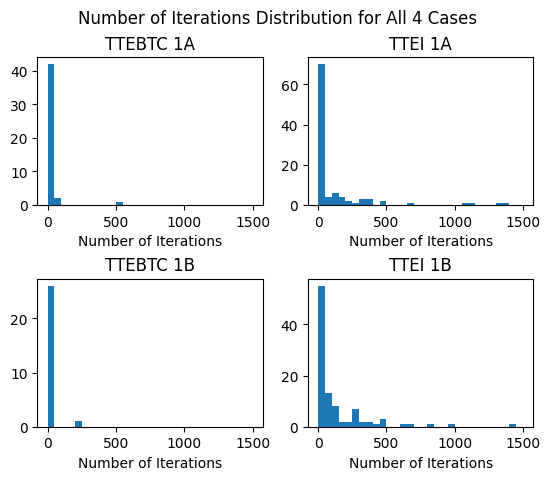

In [39]:
titles = ["TTEBTC 1A", "TTEI 1A", "TTEBTC 1B", "TTEI 1B"]
iters = [results_1_1a["iters"][TTEBTC], results_1_1a["iters"][TTEI], results_1_1b["iters"][TTEBTC], results_1_1b["iters"][TTEI]]
figure, axis = plt.subplots(2, 2)
plt.subplots_adjust(hspace = 0.5) 
plt.suptitle("Number of Iterations Distribution for All 4 Cases")
x = np.arange(1, 2001)
a, b = 0, 0
for i in range(len(iters)):
    y = iters[i]
    axis[a, b].hist(y, bins = 30, range = (0,1500))
    axis[a, b].set_xlabel("Number of Iterations")
    axis[a, b].set_title(f"{titles[i]}")
    if b < 1:
        b += 1
    else:
        a, b = 1, 0
plt.show()

C:\Users\zlyly\AppData\Local\Temp\ipykernel_18052\946356866.py:14: RuntimeWarning: divide by zero encountered in log
  ys = -np.log(line) / x


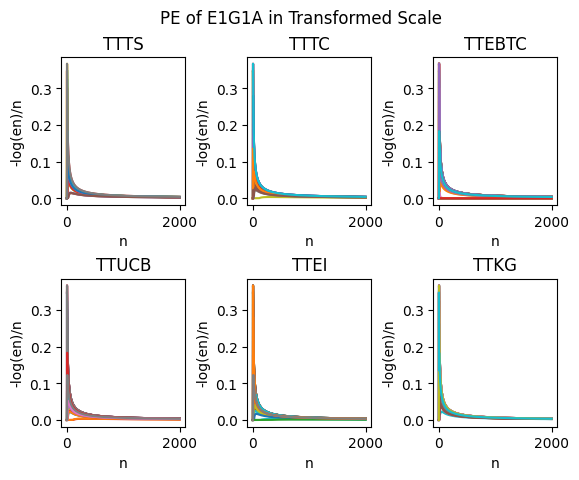

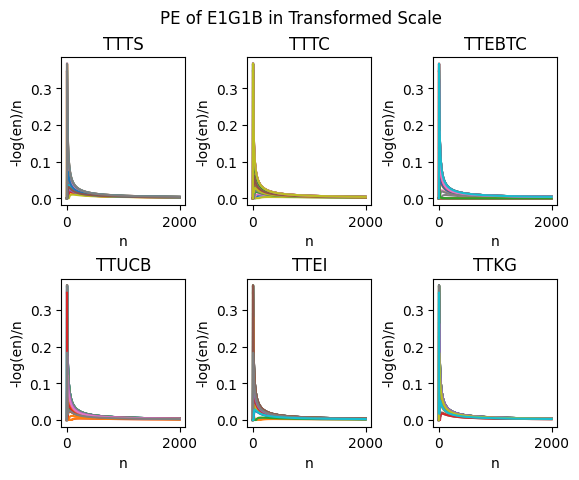

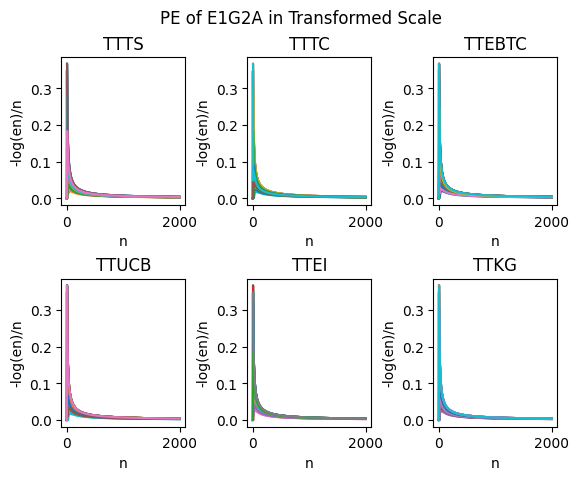

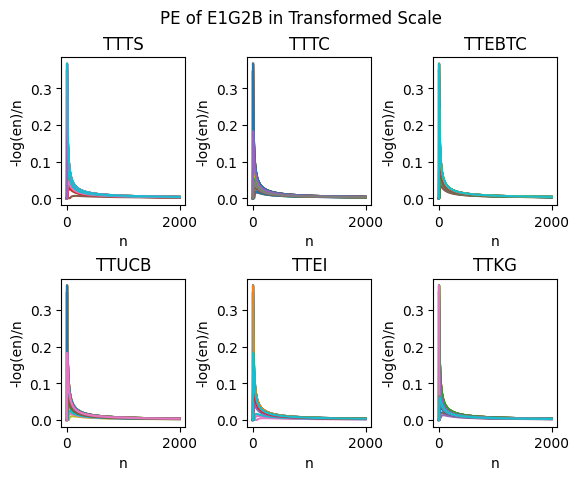

In [51]:
pes = [results_1_1a["pe"], results_1_1b["pe"], results_1_2a["pe"], results_1_2b["pe"]]
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
algo_names = ["TTTS", "TTTC", "TTEBTC", "TTUCB", "TTEI", "TTKG"]
names = ["E1G1A", "E1G1B", "E1G2A", "E1G2B"]
x = np.arange(1, 2001)

for i in range(len(pes)):
    figure, axis = plt.subplots(2, 3) 
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5) 
    plt.suptitle(f"PE of {names[i]} in Transformed Scale")
    a, b = 0, 0
    for j in range(len(pes[i])):
        line = pes[i][algos[j]]
        ys = -np.log(line) / x
        for y in ys:
            axis[a, b].plot(x, y)
        axis[a, b].set_xlabel("n")
        axis[a, b].set_ylabel("-log(en)/n")
        axis[a, b].set_title(f"{algo_names[j]}")
        if b < 2:
            b += 1
        else:
            a, b = 1, 0
    plt.show()

C:\Users\zlyly\AppData\Local\Temp\ipykernel_18052\3975945330.py:14: RuntimeWarning: divide by zero encountered in log
  ys = -np.log(line) / x


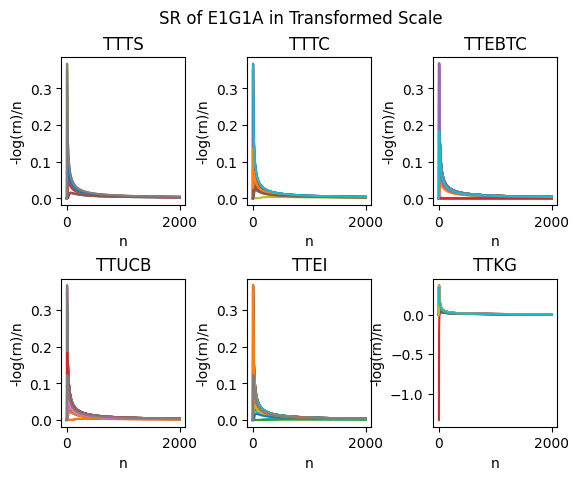

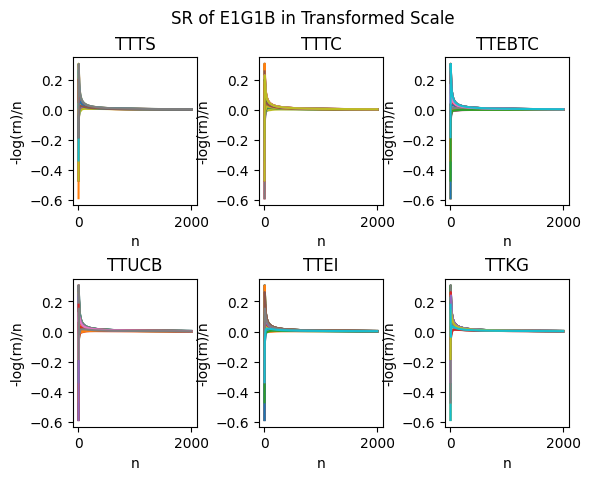

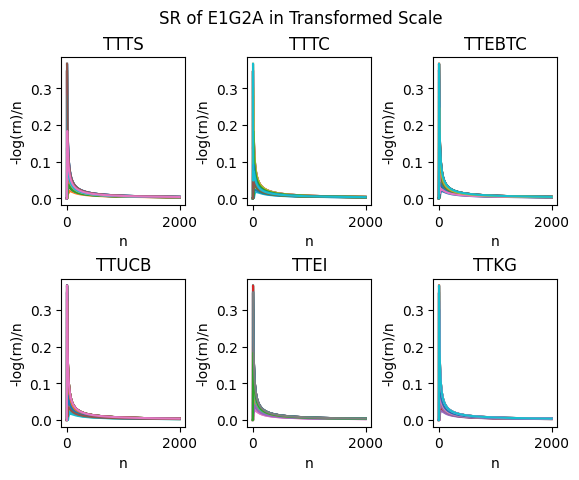

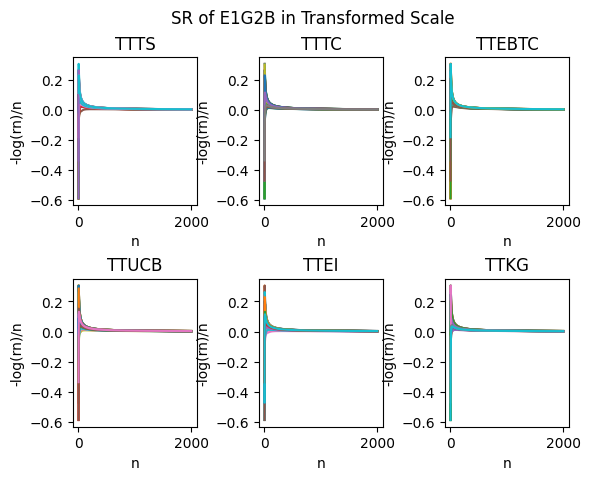

In [54]:
srs = [results_1_1a["sr"], results_1_1b["sr"], results_1_2a["sr"], results_1_2b["sr"]]
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
algo_names = ["TTTS", "TTTC", "TTEBTC", "TTUCB", "TTEI", "TTKG"]
names = ["E1G1A", "E1G1B", "E1G2A", "E1G2B"]
x = np.arange(1, 2001)

for i in range(len(pes)):
    figure, axis = plt.subplots(2, 3) 
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5) 
    plt.suptitle(f"SR of {names[i]} in Transformed Scale")
    a, b = 0, 0
    for j in range(len(srs[i])):
        line = srs[i][algos[j]]
        ys = -np.log(line) / x
        for y in ys:
            axis[a, b].plot(x, y)
        axis[a, b].set_xlabel("n")
        axis[a, b].set_ylabel("-log(rn)/n")
        axis[a, b].set_title(f"{algo_names[j]}")
        if b < 2:
            b += 1
        else:
            a, b = 1, 0
    plt.show()

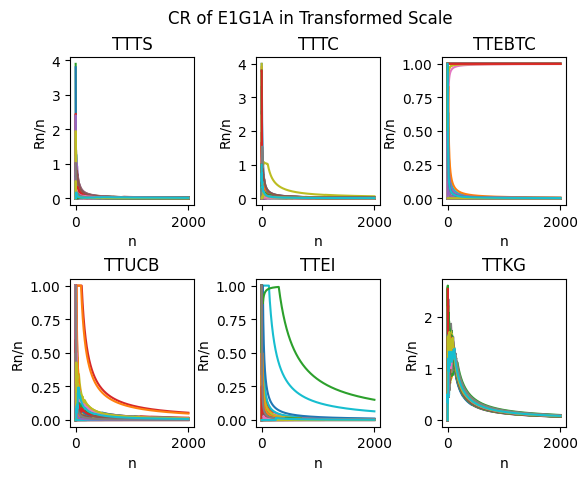

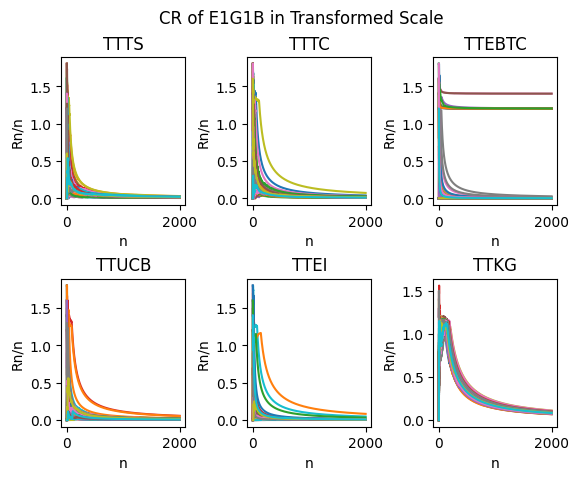

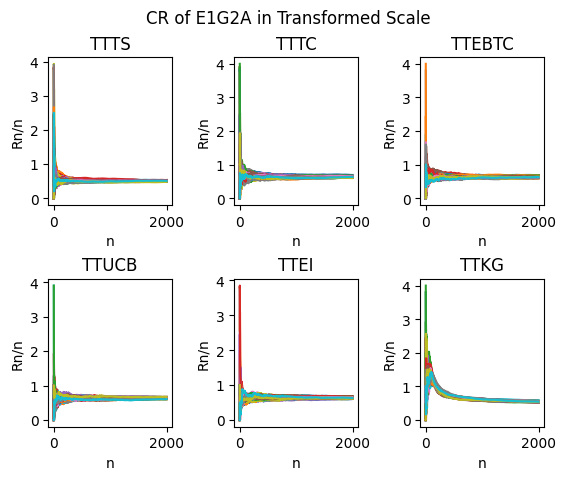

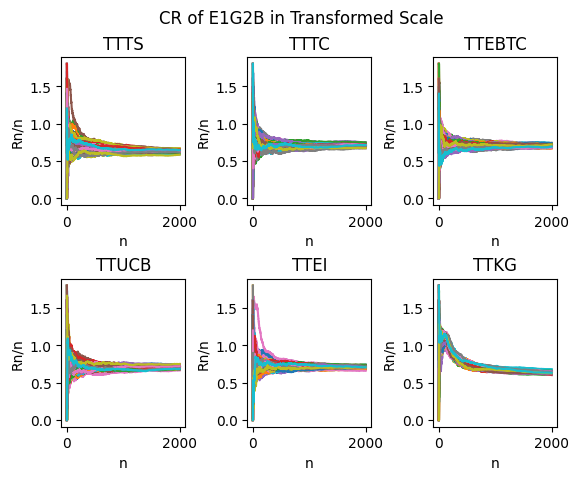

In [55]:
crs = [results_1_1a["cr"], results_1_1b["cr"], results_1_2a["cr"], results_1_2b["cr"]]
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
algo_names = ["TTTS", "TTTC", "TTEBTC", "TTUCB", "TTEI", "TTKG"]
names = ["E1G1A", "E1G1B", "E1G2A", "E1G2B"]
x = np.arange(1, 2001)

for i in range(len(crs)):
    figure, axis = plt.subplots(2, 3) 
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5) 
    plt.suptitle(f"CR of {names[i]} in Transformed Scale")
    a, b = 0, 0
    for j in range(len(crs[i])):
        line = crs[i][algos[j]]
        ys = line / x
        for y in ys:
            axis[a, b].plot(x, y)
        axis[a, b].set_xlabel("n")
        axis[a, b].set_ylabel("Rn/n")
        axis[a, b].set_title(f"{algo_names[j]}")
        if b < 2:
            b += 1
        else:
            a, b = 1, 0
    plt.show()

# WOW

In [11]:
from scipy.optimize import minimize

def update_beta() -> None:
    """ Updates the beta by maximizing the objective function."""

    # cur_best_arm = get_highest_mean(self.arms)
    # other_arms = list(filter(lambda x: x is not cur_best_arm, self.arms))
    # constants = list(map(lambda arm: np.square(arm.miu - cur_best_arm.miu), other_arms))
    # print(f"mius: {list(map(lambda x: x.miu, self.arms))}")
    # print(f"mius other: {list(map(lambda x: x.miu, other_arms))}")
    # print(f"constants: {constants}")
    # c2 = constants[0]

    def objective_function(args):
        beta, w2 = args
        return 1/beta + 1/w2

        
    
    def sum_to_1_constraint(args):
        beta, w2 = args
        constraint = beta + w2 - 1
        var2 = 1/w2 + 1/beta
        for k in range(1, 4):
            constants = [-0.5, 0.5, 0.7, 1]
            ck = constants[k]
            c2 = constants[0]
            constraint += ((c2 * beta) / (ck * beta * var2 - c2))
        return constraint

        #return args[0] + args[1] - 1
    
    def non_negative_constraint(args):
        beta, w2 = args
        constraint = [args[0], args[1]]
        var2 = 1/w2 + 1/beta
        for k in range(1, 4):
            constants = [0.2, 0.5, 0.7, 1]
            ck = constants[k]
            c2 = constants[0]
            constraint.append((c2 * beta) / (ck * beta * var2 - c2))
        # constraint = [args[0], args[1]]
        return min(constraint)

    # initial_guess = [self.beta, (1-self.beta)/len(other_arms)]
    initial_guess = [0.3, 0.3]
    # Define constraints
    constraints = (
        {"type": "eq", "fun": sum_to_1_constraint},
        {"type": "ineq", "fun": non_negative_constraint},
    )

    bounds = ([0,1],[0,1])

    # Perform the optimization with constraints
    result = minimize(objective_function, initial_guess, constraints=constraints, #bounds = bounds,
                         method="SLSQP")

    # Extract the maximized values
    
    print(f"beta: {result.x[0]}")
    print(f"2: {result.x[1]}")
    print(result.success)
    print(result.message)
    print(result.fun)
update_beta()

beta: 0.40610348194368406
2: 0.38602202376150424
True
Optimization terminated successfully
5.052952328999973


In [1]:
import numpy as np
k=5
n=10
delta = 0.0001
def c(x):
    return x + np.log(x)

np.sqrt(4*c(np.log((k-1)/delta)/2 + 8*np.log(4+np.log(n/2))))

9.390056777626645
